In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mne.stats import fdr_correction
import numpy as np
import pingouin as pg

cwd = os.getcwd()

In [ ]:
# Import R libraries for statistical models
% load_ext rpy2.ipython
%R library(lsmeans)
%R library(afex)
%R library(effsize)

# Import data

In [2]:
recall = pd.read_csv('data/Recall.csv')
intrusions = pd.read_csv('data/Intrusions.csv', sep=';')
emotion = pd.read_csv('data/Emotion.csv', sep=';')

# Ploting functions for Intrusions and recall

In [45]:
def plot_recall(group):
    if group == 1:
        pal = ['#916ab7', '#c49b6a', '#444444']
    else:
        pal = ['#916ab7', '#444444']
        
    plt.rcParams['figure.figsize'] = [6.0, 6.0]
    sns.set_context("talk")

    #Recall
    ax = sns.catplot(x="Condition", 
                     y="Recall", 
                     hue="Emotion", 
                     dodge=0.1,
                     ci=68,
                     capsize=0.2,
                     kind='point',
                     legend = False,
                     legend_out=False,
                     palette = pal,
                     data=recall[recall.Group == group])

    plt.ylim([70, 100])
    sns.despine(offset=10, trim=True)
    plt.ylabel('Recall (%)', size = 20, fontweight = 'bold')
    plt.xlabel('')
    plt.xticks(size = 20, fontweight = 'bold')
    plt.savefig('Recall_Group' + str(group) + '.svg', dpi=600, bbox_inches='tight')

def plot_intrusions(group):
   
    if group == 1:
        pal = ['#c49b6a', '#916ab7', '#444444']
    else:
        pal = ['#916ab7', '#444444']

    plt.rcParams['figure.figsize'] = [6.0, 6.0]
    sns.set_context("talk")
    sns.lineplot(x="Sessions",
                 y="Intrusions_per",
                 ci=68,
                 legend=False,
                 linewidth=5,
                 marker="o",
                 markersize=14,
                 palette = pal,
                 hue="Emotion",
                 data=intrusions[(intrusions.Condition == 'No-Think') & (intrusions.Group == group)])    
   
    
    plt.ylim([10, 60])
    sns.despine(offset=10, trim=True)
    plt.ylabel('Intrusions (%)', size = 20, fontweight = 'bold')
    plt.xlabel('TNT blocks', size = 20, fontweight = 'bold')
    plt.tight_layout()
    plt.savefig('Intrusions_Group' + str(group) + '.svg', dpi=600, bbox_inches='tight')
    plt.show()

# Group 1 

## Recall

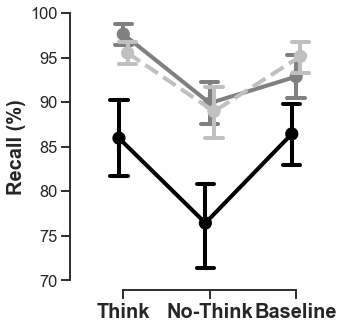

In [49]:
pal = ['#000000', '#808080', '#c0c0c0']

plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context("talk")

#Recall
ax = sns.catplot(x="Condition", 
                 y="Recall", 
                 hue="Emotion", 
                 dodge=0.1,
                 ci=68,
                 capsize=0.2,
                 kind='point',
                 linestyles=["-", "-", "--"],
                 legend = False,
                 legend_out=False,
                 palette = pal,
                 data=recall[recall.Group == 1])

plt.ylim([70, 100])
sns.despine(offset=10, trim=True)
plt.ylabel('Recall (%)', size = 20, fontweight = 'bold')
plt.xlabel('')
plt.xticks(size = 20, fontweight = 'bold')
plt.savefig('Recall_Group1.svg', dpi=600, bbox_inches='tight')

### ANOVA

In [13]:
%%R -i recall -o stats

# Keep only Group 1
recall = filter(recall, Group == 1)

# ANOVA
stats = aov_ez(recall,                           
                id="Subject",                     
                dv="Recall",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Recall
             Effect          df    MSE         F  ges p.value
1           Emotion 1.32, 35.51 287.13 16.01 ***  .09  <.0001
2         Condition 1.74, 47.04 208.72   8.17 **  .05    .001
3 Emotion:Condition 2.61, 70.44 186.81      0.86 .007     .45
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


### t test

In [16]:
%%R -i recall -o stats

NT = filter(recall, Group == 1, Condition == 'No-Think', Emotion == 'Disgust')$Recall
BA = filter(recall, Group == 1, Condition == 'Baseline', Emotion == 'Disgust')$Recall

print(t.test(NT, BA, paired = T))
print(cohen.d(NT, BA, paired = T))


	Paired t-test

data:  NT and BA
t = -2.2773, df = 27, p-value = 0.03091
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.0100303  -0.9899697
sample estimates:
mean of the differences 
                    -10 


Cohen's d

d estimate: -0.4303643 (small)
95 percent confidence interval:
       inf        sup 
-0.9723580  0.1116294 


## Intrusions

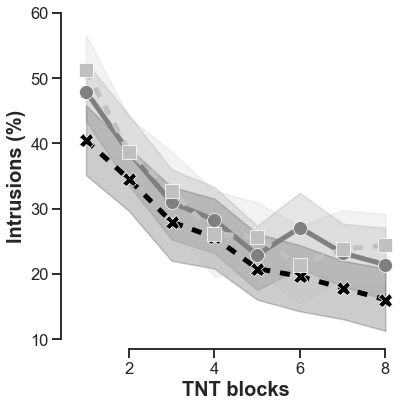

In [48]:
pal = ['#808080', '#000000', '#c0c0c0']

plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context("talk")
sns.lineplot(x="Sessions",
             y="Intrusions_per",
             ci=68,
             legend=False,
             linewidth=5,
             style="Emotion",
             dashes=[(1, 0), (2, 2), (2, 2)],
             markers=True,
             markersize=14,
             palette = pal,
             hue="Emotion",
             data=intrusions[(intrusions.Condition == 'No-Think') & (intrusions.Group == 1)])

plt.ylim([10, 60])
sns.despine(offset=10, trim=True)
plt.ylabel('Intrusions (%)', size = 20, fontweight = 'bold')
plt.xlabel('TNT blocks', size = 20, fontweight = 'bold')
plt.tight_layout()
plt.savefig('Intrusions_Group1.svg', dpi=600, bbox_inches='tight')
plt.show()

### ANOVA

In [28]:
%%R -i intrusions -o stats
intrusions = filter(intrusions, Condition == 'No-Think')

# Keep only Group 1
Intrusions = filter(intrusions, Group == 1, Condition == 'No-Think')

# ANOVA
stats = aov_ez(intrusions,                           
                id="Subject",                     
                dv="Intrusions_per",                         
                within=c("Emotion", "Sessions"))
stats

Anova Table (Type 3 tests)

Response: Intrusions_per
            Effect           df    MSE         F  ges p.value
1          Emotion  1.60, 43.18 593.70    3.82 * .007     .04
2         Sessions  3.21, 86.62 724.90 21.00 ***  .08  <.0001
3 Emotion:Sessions 7.41, 200.10 276.18      0.78 .003     .62
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


In [16]:
pg.rm_anova(data=intrusions[(intrusions.Group==1) & (intrusions.Condition=='No-Think')],
            dv='Intrusions_per',
            subject='Subject',
            within=['Emotion', 'Sessions'])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Emotion,3623.512,2,54,1811.756,3.816,2.816642e-02,3.850713e-02,0.124,0.800
1,Sessions,48832.259,7,189,6976.037,20.999,8.742383e-21,1.026548e-10,0.437,0.458
2,Emotion * Sessions,1588.128,14,378,113.438,0.776,6.955508e-01,5.634471e-01,0.028,0.341


### t test

In [19]:
%%R -i recall -o stats

dis = filter(intrusions, Group == 1, Condition == 'No-Think', Emotion == 'Disgust')%>%group_by(Subject)%>%summarise(Intrusions_per = mean(Intrusions_per))
sad = filter(intrusions, Group == 1, Condition == 'No-Think', Emotion == 'Sadness')%>%group_by(Subject)%>%summarise(Intrusions_per = mean(Intrusions_per))

print(t.test(dis$Intrusions_per, sad$Intrusions_per, paired = T))
print(cohensD(dis$Intrusions_per, sad$Intrusions_per, method = 'paired'))


	Paired t-test

data:  dis$Intrusions_per and sad$Intrusions_per
t = -2.0458, df = 27, p-value = 0.05063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.28307917   0.01522202
sample estimates:
mean of the differences 
              -5.133929 

[1] 0.3866132


# Group 2

## Recall

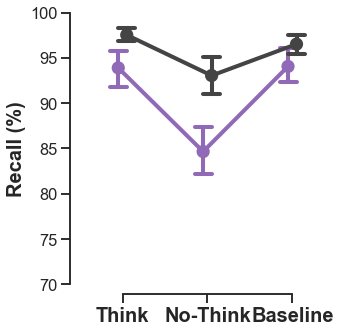

In [50]:
pal = ['#916ab7', '#444444']

plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context("talk")

#Recall
ax = sns.catplot(x="Condition", 
                 y="Recall", 
                 hue="Emotion", 
                 dodge=0.1,
                 ci=68,
                 capsize=0.2,
                 kind='point',
                 legend = False,
                 legend_out=False,
                 palette = pal,
                 data=recall[recall.Group == 2])

plt.ylim([70, 100])
sns.despine(offset=10, trim=True)
plt.ylabel('Recall (%)', size = 20, fontweight = 'bold')
plt.xlabel('')
plt.xticks(size = 20, fontweight = 'bold')
plt.savefig('Recall_Group2.svg', dpi=600, bbox_inches='tight')

### ANOVA

In [21]:
%%R -i recall -o stats

# Keep only Group 2
recall = filter(recall, Group == 2)

# ANOVA
stats = aov_ez(recall,                           
                id="Subject",                     
                dv="Recall",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Recall
             Effect          df   MSE         F ges p.value
1           Emotion       1, 23 69.08  12.17 ** .07    .002
2         Condition 1.56, 35.89 54.01 16.85 *** .11  <.0001
3 Emotion:Condition 1.44, 33.05 65.52      2.52 .02     .11
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


### t test

In [23]:
%%R -i recall -o stats

NT = filter(recall, Group == 2, Condition == 'No-Think', Emotion == 'Disgust')$Recall
BA = filter(recall, Group == 2, Condition == 'Baseline', Emotion == 'Disgust')$Recall

print(t.test(NT, BA, paired = T, alternative = 'less'))
print(cohen.d(NT, BA, method = 'paired'))


	Paired t-test

data:  NT and BA
t = -4.404, df = 23, p-value = 0.0001028
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -5.745902
sample estimates:
mean of the differences 
              -9.406566 


Cohen's d

d estimate: -0.8158123 (large)
95 percent confidence interval:
       inf        sup 
-1.4205731 -0.2110514 


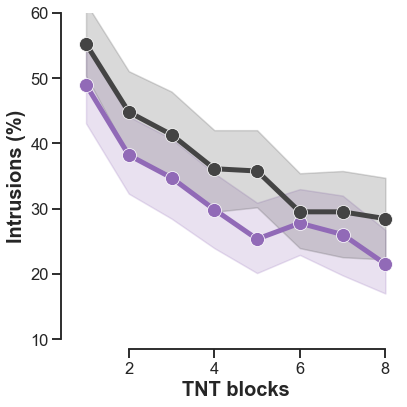

In [51]:
pal = ['#916ab7', '#444444']

plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context("talk")
sns.lineplot(x="Sessions",
             y="Intrusions_per",
             ci=68,
             legend=False,
             linewidth=5,
             marker="o",
             markersize=14,
             palette = pal,
             hue="Emotion",
             data=intrusions[(intrusions.Condition == 'No-Think') & (intrusions.Group == 2)])    


plt.ylim([10, 60])
sns.despine(offset=10, trim=True)
plt.ylabel('Intrusions (%)', size = 20, fontweight = 'bold')
plt.xlabel('TNT blocks', size = 20, fontweight = 'bold')
plt.tight_layout()
plt.savefig('Intrusions_Group2.svg', dpi=600, bbox_inches='tight')
plt.show()

### ANOVA

In [29]:
%%R -i intrusions -o stats

# Keep only Group 1
Intrusions = filter(intrusions, Group == 2, Condition == 'No-Think')

# ANOVA
stats = aov_ez(intrusions,
               id="Subject",
               dv="Intrusions_per",
               within=c("Emotion", "Sessions"))
stats

Anova Table (Type 3 tests)

Response: Intrusions_per
            Effect           df    MSE         F  ges p.value
1          Emotion  1.37, 37.12 305.52   9.70 **  .03    .001
2         Sessions  3.33, 90.04 207.82 19.12 ***  .08  <.0001
3 Emotion:Sessions 8.13, 219.58  89.27      1.32 .007     .23
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


# Emotional valence

## Plot

In [30]:
def plot_emotion(df, group):
    plt.rcParams['figure.figsize'] = [6.0, 6.0]
    sns.set_context("talk")
    
    # Show each observation with a scatterplot
    sns.stripplot(x="Emotion", y="Difference", hue="Condition",
                  data=df, 
                  dodge=True,
                  hue_order=['Think', 'No-Think', 'Baseline'], 
                  size=5,
                  alpha = 0.4,
                  linewidth=1.5,
                  jitter = True,
                  edgecolor = 'k',
                  palette=[sns.xkcd_rgb["medium green"],
                           sns.xkcd_rgb["pale red"],
                           sns.xkcd_rgb["denim blue"]])
    # Show means
    sns.barplot(x="Emotion", y="Difference", hue="Condition",              
                data=df,
                hue_order=['Think', 'No-Think', 'Baseline'], 
                palette=[sns.xkcd_rgb["medium green"],
                         sns.xkcd_rgb["pale red"],
                         sns.xkcd_rgb["denim blue"]],
                linewidth=1.5,
                edgecolor = [".2", ".2"],
                ci=68,
                capsize=.05)
    
    if group == 2:
        
        # statistical annotation 2
        x1, x2 = 1, 1.27   # columns NT and BA
        y = 2.2
        plt.plot([x1, x1, x2, x2], [y-0.1, y, y, y-0.1], lw=4, c='k')
        plt.text((x1+x2)*.5, y, "*", 
                 ha='center', 
                 va='bottom', 
                 color='k',
                 weight = 'bold',
                 fontsize=35)
    
    # Draw horizontal line
    plt.axhline(y=0, color = 'black', linestyle='--')    

    sns.despine(offset=10, trim=True)

    plt.ylabel('$\Delta$' + ' valence rating', size = 20, fontweight = 'bold')
    plt.xlabel('')
    plt.xticks(size = 20, fontweight = 'bold')
    plt.savefig('Emotion_Group%d.svg'%group, dpi=600,bbox_inches='tight')
    plt.show()

## Group 1

C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


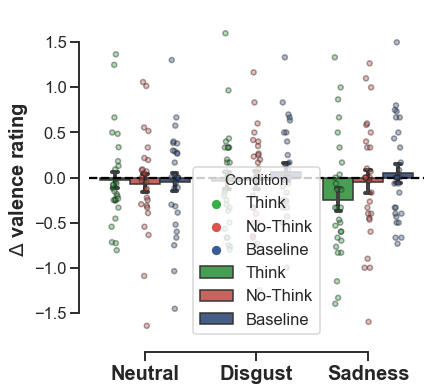

In [31]:
session1 = emotion[(emotion.Group == 1) & (emotion.Session == 1)]
session2 = emotion[(emotion.Group == 1) & (emotion.Session == 2)]

# Compute difference
session2['Difference'] = np.asarray(session2.Valence) - np.asarray(session1.Valence)
# Plot
plot_emotion(session2, group = 1)

### ANOVA

In [33]:
%%R -i session2 -o stats

# ANOVA
stats = aov_ez(session2,                           
                id="Subject",                     
                dv="Difference",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Difference
             Effect          df  MSE    F  ges p.value
1           Emotion 1.70, 45.87 0.55 0.28 .003     .72
2         Condition 1.95, 52.57 0.29 1.17 .008     .32
3 Emotion:Condition 3.63, 98.10 0.23 0.93 .010     .44
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


## Group 2

C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


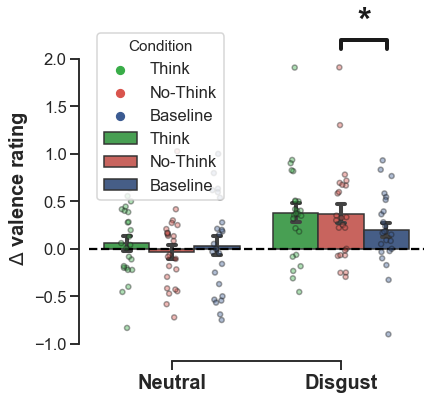

In [32]:
session1 = emotion[(emotion.Group == 2) & (emotion.Session == 1)]
session2 = emotion[(emotion.Group == 2) & (emotion.Session == 2)]

# Compute difference
session2['Difference'] = np.asarray(session2.Valence) - np.asarray(session1.Valence)
# Plot
plot_emotion(session2, group = 2)

## ANOVA

In [37]:
%%R -i session2 -o stats

# ANOVA
stats = aov_ez(session2,                           
                id="Subject",                     
                dv="Difference",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Difference
             Effect          df  MSE       F  ges p.value
1           Emotion       1, 23 0.32 9.78 **  .10    .005
2         Condition 1.97, 45.38 0.08    1.43 .009     .25
3 Emotion:Condition 1.94, 44.63 0.12    1.42  .01     .25
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


## t test

In [38]:
%%R -i session2

NT = filter(session2, Condition == 'Baseline', Emotion == 'Emotion')$Difference
BA = filter(session2, Condition == 'No-Think', Emotion == 'Emotion')$Difference

print(t.test(NT, BA, paired = T), alternative = 'greater')
print(cohen.d(NT, BA, method = 'paired'))


	Paired t-test

data:  NT and BA
t = 0.74364, df = 23, p-value = 0.4646
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1127090  0.2392212
sample estimates:
mean of the differences 
             0.06325607 


Cohen's d

d estimate: 0.1421071 (negligible)
95 percent confidence interval:
       inf        sup 
-0.4396987  0.7239130 


# EEG 

In [2]:
eeg = pd.read_csv('EEG_TNT.txt')

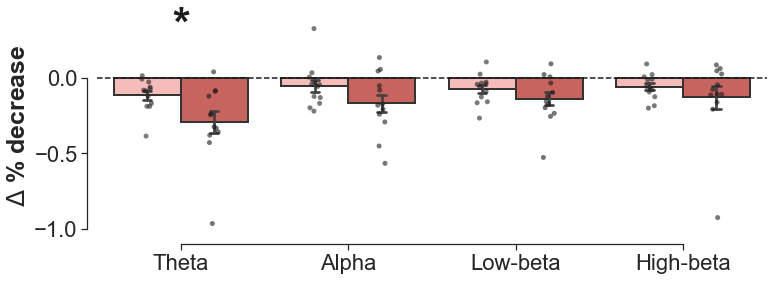

In [28]:
plt.rcParams['figure.figsize'] = [12.0, 4.0]
sns.set_context("notebook", font_scale=2.0)

# Plot
f, ax = plt.subplots()

sns.barplot(data=eeg, 
            x="Frequency", 
            y="value",
            hue='variable',
            linewidth=2.,
            dodge=True,
            capsize=.05,
            ci=68,
            palette=['#ffb3af', '#d9544d'],
            edgecolor=[".2", ".2"])
sns.stripplot(data=eeg, 
              x="Frequency", 
              y="value",
              jitter=0.07,
              alpha=0.6,
              dodge=True,
              edgecolor='k',
              size=5,
              color='k',
              hue='variable')
plt.axhline(y=0, linestyle='--', color='k')
plt.ylabel('$\Delta$' + ' % decrease', size = 25, fontweight = 'bold')
ax.xaxis.label.set_visible(False)
# Improve the legend 
ax.get_legend().set_visible(False)
sns.despine(offset=10, trim=True)

# statistical annotation
x1, x2 = -0.2, 0.2   # columns NT and BA
y = 0.2
plt.text(0, 0.2, "*", 
         ha='center', 
         va='bottom', 
         color='k',
         weight = 'bold',
         fontsize=45)
plt.savefig(cwd + '/Figures/EEG_BPM_TNT.svg', dpi=300)

In [15]:
pg.mwu(eeg.value[(eeg.Frequency=='Theta') & (eeg.variable=='Low control')],
       eeg.value[(eeg.Frequency=='Theta') & (eeg.variable=='High control')])

,U-val,p-val,RBC,CLES
MWU,110.0,0.030383,-0.528,0.764


In [17]:
pg.mwu(eeg.value[(eeg.Frequency=='Alpha') & (eeg.variable=='Low control')],
       eeg.value[(eeg.Frequency=='Alpha') & (eeg.variable=='High control')])

,U-val,p-val,RBC,CLES
MWU,95.0,0.193931,-0.319,0.66


In [18]:
pg.mwu(eeg.value[(eeg.Frequency=='Low-beta') & (eeg.variable=='Low control')],
       eeg.value[(eeg.Frequency=='Low-beta') & (eeg.variable=='High control')])

,U-val,p-val,RBC,CLES
MWU,89.0,0.340779,-0.236,0.618


In [19]:
pg.mwu(eeg.value[(eeg.Frequency=='High-beta') & (eeg.variable=='Low control')],
       eeg.value[(eeg.Frequency=='High-beta') & (eeg.variable=='High control')])

,U-val,p-val,RBC,CLES
MWU,77.0,0.795012,-0.069,0.535


In [15]:
eeg = pd.read_csv('EEG_Intrusions.txt')

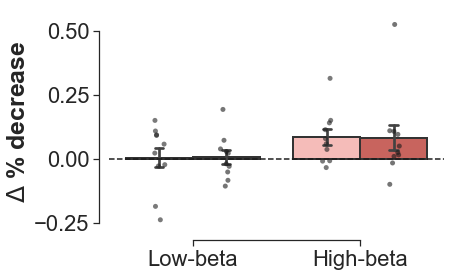

In [16]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
sns.set_context("notebook", font_scale=2.0)

# Plot
f, ax = plt.subplots()

sns.barplot(data=eeg, 
            x="Frequency", 
            y="value",
            hue='variable',
            linewidth=2.,
            dodge=True,
            capsize=.05,
            ci=68,
            palette=['#ffb3af', '#d9544d'],
            edgecolor=[".2", ".2"])
sns.stripplot(data=eeg, 
              x="Frequency", 
              y="value",
              jitter=0.07,
              alpha=0.6,
              dodge=True,
              edgecolor='k',
              size=5,
              color='k',
              hue='variable')
plt.axhline(y=0, linestyle='--', color='k')
plt.ylabel('$\Delta$' + ' % decrease', size = 25, fontweight = 'bold')
ax.xaxis.label.set_visible(False)
# Improve the legend 
ax.get_legend().set_visible(False)
sns.despine(offset=10, trim=True)

plt.savefig(cwd + '/Figures/EEG_BPM_Intrusions.svg', dpi=300)

In [17]:
pg.mwu(eeg.value[(eeg.Frequency=='Low-beta') & (eeg.variable=='Low control')],
       eeg.value[(eeg.Frequency=='Low-beta') & (eeg.variable=='High control')])

,U-val,p-val,RBC,CLES
MWU,58.0,0.57075,-0.16,0.58


In [18]:
pg.mwu(eeg.value[(eeg.Frequency=='High-beta') & (eeg.variable=='Low control')],
       eeg.value[(eeg.Frequency=='High-beta') & (eeg.variable=='High control')])

,U-val,p-val,RBC,CLES
MWU,58.0,0.57075,-0.16,0.58
